In [2]:
import torch
import torch.nn.functional as F
import torch.nn as nn

In [26]:
torch.set_printoptions(precision=2)
SEED = 42
_ = torch.manual_seed(SEED)

# Flatten

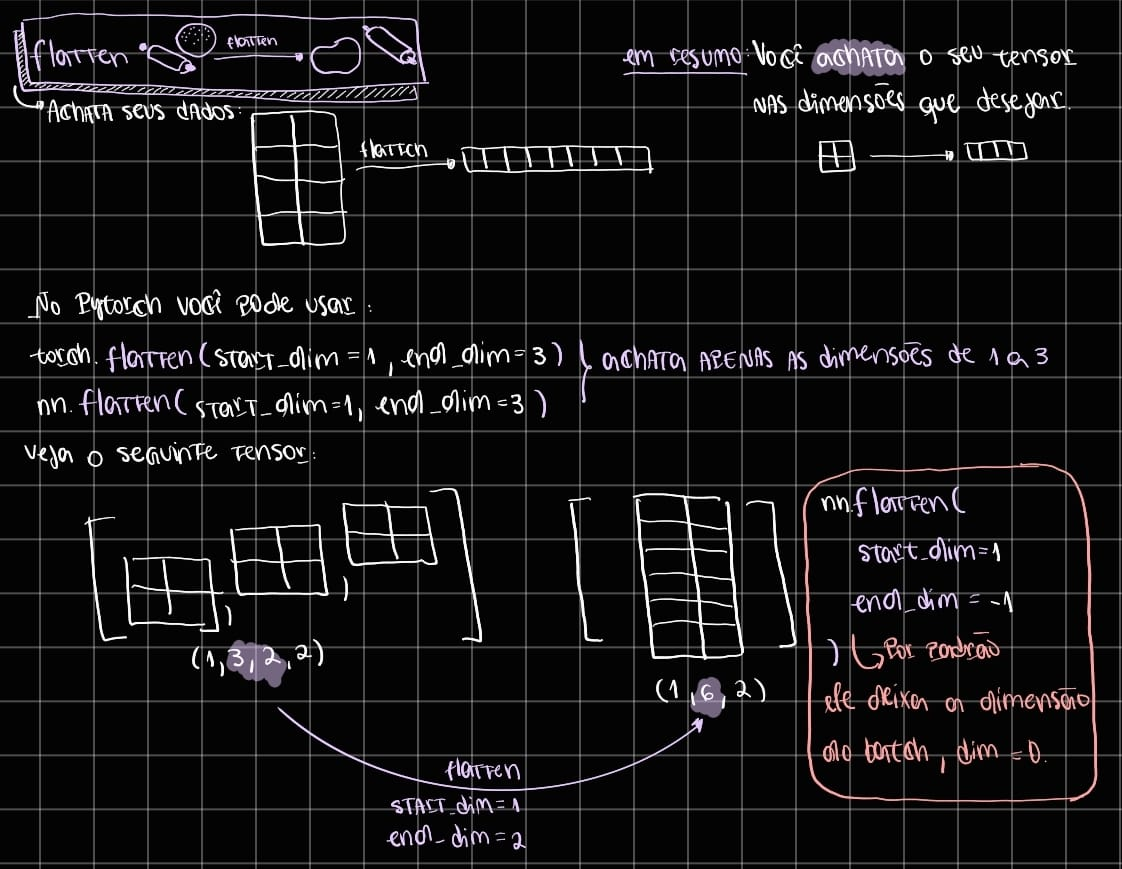

In [50]:
# Creating our example tensor
torch.manual_seed(SEED)
tensor = torch.randn(2, 3, 4, 5)
tensor

tensor([[[[ 1.93,  1.49,  0.90, -2.11,  0.68],
          [-1.23, -0.04, -1.60, -0.75,  1.65],
          [-0.39, -1.40, -0.73, -0.56, -0.77],
          [ 0.76,  1.64, -0.16, -0.50,  0.44]],

         [[-0.76,  1.08,  0.80,  1.68,  1.28],
          [ 1.30,  0.61,  1.33, -0.23,  0.04],
          [-0.25,  0.86, -1.38, -0.87, -0.22],
          [ 1.72,  0.32, -0.42,  0.31, -0.77]],

         [[-1.56,  1.00, -0.88, -0.60, -1.27],
          [ 2.12, -1.23, -0.49, -0.91, -0.66],
          [ 0.08,  0.53, -0.49,  1.19, -0.81],
          [-0.74, -1.40,  0.04, -0.06,  0.68]]],


        [[[-0.10,  1.84, -1.18,  1.38,  1.45],
          [ 0.86,  2.22,  0.52,  0.35, -0.20],
          [-1.05,  1.28, -0.17,  0.52,  0.06],
          [ 0.43,  0.58, -0.64, -2.21, -0.75]],

         [[ 0.01, -0.34, -1.34, -0.59,  0.54],
          [ 0.52,  1.14,  0.05,  0.74, -0.48],
          [-1.05,  0.60, -1.72, -0.83,  1.33],
          [ 0.48, -2.51,  0.49,  0.78,  0.03]],

         [[ 0.64,  0.58,  1.07, -0.45,  1.03],
 

flattening dimensions 1 and 2, dim1 has 3 and dim2 has 4 values, as we will flatten them we will have: 3 x 4 = 12 and our tensor will go from a shape of (2, 3, 4, 5) to (2, 12, 5)

In [51]:
flatten = torch.flatten(tensor, start_dim=1, end_dim=2)
print(flatten)

tensor([[[ 1.93,  1.49,  0.90, -2.11,  0.68],
         [-1.23, -0.04, -1.60, -0.75,  1.65],
         [-0.39, -1.40, -0.73, -0.56, -0.77],
         [ 0.76,  1.64, -0.16, -0.50,  0.44],
         [-0.76,  1.08,  0.80,  1.68,  1.28],
         [ 1.30,  0.61,  1.33, -0.23,  0.04],
         [-0.25,  0.86, -1.38, -0.87, -0.22],
         [ 1.72,  0.32, -0.42,  0.31, -0.77],
         [-1.56,  1.00, -0.88, -0.60, -1.27],
         [ 2.12, -1.23, -0.49, -0.91, -0.66],
         [ 0.08,  0.53, -0.49,  1.19, -0.81],
         [-0.74, -1.40,  0.04, -0.06,  0.68]],

        [[-0.10,  1.84, -1.18,  1.38,  1.45],
         [ 0.86,  2.22,  0.52,  0.35, -0.20],
         [-1.05,  1.28, -0.17,  0.52,  0.06],
         [ 0.43,  0.58, -0.64, -2.21, -0.75],
         [ 0.01, -0.34, -1.34, -0.59,  0.54],
         [ 0.52,  1.14,  0.05,  0.74, -0.48],
         [-1.05,  0.60, -1.72, -0.83,  1.33],
         [ 0.48, -2.51,  0.49,  0.78,  0.03],
         [ 0.64,  0.58,  1.07, -0.45,  1.03],
         [-0.70,  1.01, -0.33,  

In [52]:
print(flatten.shape)

torch.Size([2, 12, 5])


flattening in all dimensions

In [54]:
flatten = torch.flatten(tensor)
print(flatten)

tensor([ 1.93,  1.49,  0.90, -2.11,  0.68, -1.23, -0.04, -1.60, -0.75,  1.65,
        -0.39, -1.40, -0.73, -0.56, -0.77,  0.76,  1.64, -0.16, -0.50,  0.44,
        -0.76,  1.08,  0.80,  1.68,  1.28,  1.30,  0.61,  1.33, -0.23,  0.04,
        -0.25,  0.86, -1.38, -0.87, -0.22,  1.72,  0.32, -0.42,  0.31, -0.77,
        -1.56,  1.00, -0.88, -0.60, -1.27,  2.12, -1.23, -0.49, -0.91, -0.66,
         0.08,  0.53, -0.49,  1.19, -0.81, -0.74, -1.40,  0.04, -0.06,  0.68,
        -0.10,  1.84, -1.18,  1.38,  1.45,  0.86,  2.22,  0.52,  0.35, -0.20,
        -1.05,  1.28, -0.17,  0.52,  0.06,  0.43,  0.58, -0.64, -2.21, -0.75,
         0.01, -0.34, -1.34, -0.59,  0.54,  0.52,  1.14,  0.05,  0.74, -0.48,
        -1.05,  0.60, -1.72, -0.83,  1.33,  0.48, -2.51,  0.49,  0.78,  0.03,
         0.64,  0.58,  1.07, -0.45,  1.03, -0.70,  1.01, -0.33,  0.52,  0.39,
        -0.58, -0.17, -0.57,  0.51, -0.48, -0.49,  0.27, -0.56,  0.68,  0.44])


In [55]:
# 2 * 3 * 4 * 5 = 120
print(flatten.shape)

torch.Size([120])


# View

The `.view()` method in PyTorch rearranges the elements of a tensor to a new shape without changing the data. It is useful for changing the shape of a tensor while keeping the number of elements the same.

`.view()` rearranges the tensor by saving it in the same location in memory, it does not make any copies, `.reshape()` can make copies.

To use `.view()` your tensor needs to be `.contiguous()`.
```python
x = torch.randn(3, 4)
x_t = x.t()  # Transposes the tensor, making it non-contiguous
print(x_t.is_contiguous())  # False
# Trying to use .view() on a non-contiguous tensor throws an error
x_t.view(12)  # RuntimeError: view size is not compatible...

x_t_cont = x_t.contiguous()  # Copies data to make it contiguous
x_t_view = x_t_cont.view(12)  # It worked
```

`contiguous()`: PyTorch stores tensors in memory as a continuous block of values. However, certain operations, such as transposition:
```python
x = torch.randn(3, 4)
x = x.t()  # transpose
x = x.permute()  # permutation
x = x[:, ::-1]  # slicing
```
Can change the way data is accessed without actually reorganizing memory. This creates non-contiguous tensors.  

The .view() method relies on the contiguous memory layout to simply “reinterpret” the data without moving it. If the tensor is non-contiguous, the organization of the data in memory does not allow for a direct shape change, so view() fails.

# Axis

In PyTorch, `axis` (or dimension) defines how data is organized within a tensor. Each tensor has one or more dimensions, and different operations can be applied along these dimensions.

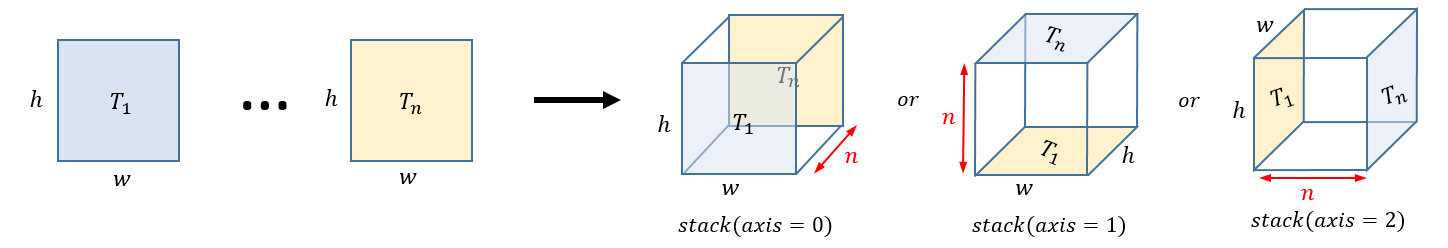

# Reshape

Similar to `view()`, but may create copies if necessary.

# Permute

Reorganizes dimensions without changing memory (useful for CNNs).

# Transpose

Swaps two specific dimensions (like .t() for 2D matrices).

# Unsqueeze & Squeeze

Adds or removes dimensions of size 1.

# Cat & Stack

Concatenates and stacks tensors.

# Split & Chunk

Splits tensors into smaller parts.

# Expand & Repeat

Replicates tensors without or with memory copy.

# Eisum

Performs `complex linear algebra operations` in a compact way.

# Mathematical Operations

`sum()`, `mean()`, `max()`, `argmax()`, `norm()`